In [9]:
import IPython.display as display

# The path to the image file
image_path = "/Users/miattas/Documents/Most Forked NLP.jpg"

# Display the image
display.display(Image(filename=image_path))


NameError: name 'Image' is not defined

<div style="text-align: center; margin: 0 auto">
  <span style="font-size: 30px; font-weight: bold; color:red">Most Forked Repositories Project- Forking Solutions</span>
</div>


# <span style="color: gray">Project Description:</span>

In this project we will be utilizing data from GitHub README files to analyze and predict programming language based on the content. [Back to top]

# <span style="color: gray"> Project Goal:</span>

The goal is to analyze develop a ML model that can accuratly predict the primary programming language of a repository. This will permit higher effecacy categorization and organization of code repositories, making it easier for developers to find relevant projects and collaborate with others. 

# <span style="color: red">Project Description:</span>
 Initial Thoughts/Questions:

Are there any notable variations in the frequency of words between README files written in different programming languages?
Does the presence of specific libraries in the README file correspond with the programming language used?
What are the most frequently used words throughout the dataset and for each language?
What are the least frequently used words throughout the dataset and for each language?

# <span style="color: red">Project Description:</span>
 Data Dictionary


### Data Used

Attribute	Definition	Data Type
fixed acidity	Amount of non-volatile acids in a substance	float
volatile acidity	Amount of volatile acids in a substance	float
citric acid	Amount of citric acid in a substance	float
residual sugar	Amount of residual sugar in a substance	float
chlorides	Concentration of chlorides in a substance	float
free sulfur dioxide	Level of free sulfur dioxide in a substance	float
total sulfur dioxide	Total sulfur dioxide content in a substance	float
density	The density of a substance	float
pH	The pH level of a substance	float
sulphates	Amount of sulfates in a substance	float
proof	twice the percentage of alcohol by volume	float
quality	The quality rating of a substance	float
strain	Type of wine	object
**		




In [1]:
# Import Libraries
import os
import time
import json

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Custom Modules
import wrangle as w
import model as m

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import plotly.express as px




# Natural Language Processing and Modeling
import nltk.sentiment
import nltk
from nltk.tokenize import ToktokTokenizer
import re
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import f_oneway, stats
from typing import Dict, List, Optional, Union, cast
import sklearn.model_selection 

# Web Scraping
import requests
from bs4 import BeautifulSoup
from env_miatta import github_token, github_username as e

# Warnings
import warnings
warnings.filterwarnings('ignore')






# ACQUIRE

In [2]:
# Aquire data using methods described above.
#Read the combined JSON data into a DataFrame
words_df = w.pd.read_json('data2.json')
words_df



,repo,language,readme_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr..."
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...
3,learn-co-students/python-dictionaries-readme-d...,Jupyter Notebook,\n# Dictionaries \n\n### Introduction\n\nAfter...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...
...,...,...,...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
114,tastejs/todomvc,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
115,learn-co-students/jupyter-notebook-introductio...,Jupyter Notebook,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
116,hasura-imad/imad-2016-app,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."


In [5]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
words_df.head().T


,0,1,2,3,4
repo,TheAlgorithms/Python,apache/flink,forezp/SpringCloudLearning,learn-co-students/python-dictionaries-readme-d...,angular/angular-phonecat
language,Python,Java,Java,Jupyter Notebook,JavaScript
readme_contents,"<div align=""center"">\n<!-- Title: -->\n <a hr...",# Apache Flink\n\nApache Flink is an open sour...,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,\n# Dictionaries \n\n### Introduction\n\nAfter...,# AngularJS Phone Catalog Tutorial Application...


# PREPARE

### Data Cleaning:
    
- Drop unnecessary axis
- Rename
- Find nulls
- Drop nulls
- Prepare data types
- The data set has 3 columns and 118 rows

In [9]:
words_df.shape


(118, 3)

In [10]:
# Check for missing values
missing_values = words_df.isnull()
missing_values


,repo,language,readme_contents
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
113,False,False,False
114,False,False,False
115,False,False,False
116,False,False,False


In [11]:
words_df.isnull().sum()


repo                0
language           13
readme_contents     0
dtype: int64

In [12]:
# Drop rows with any missing values
words_df_dropped = words_df.dropna()
words_df_dropped


,repo,language,readme_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr..."
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...
3,learn-co-students/python-dictionaries-readme-d...,Jupyter Notebook,\n# Dictionaries \n\n### Introduction\n\nAfter...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...
...,...,...,...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
114,tastejs/todomvc,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
115,learn-co-students/jupyter-notebook-introductio...,Jupyter Notebook,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
116,hasura-imad/imad-2016-app,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."


In [13]:
rows_with_missing_language = words_df[words_df['language'].isnull()]

# Change data types of the isolated rows to 'object'
rows_with_missing_language = rows_with_missing_language.astype({'language': 'object'})

# Display the modified isolated rows
rows_with_missing_language


,repo,language,readme_contents
9,vivienzou1/DL-Notes-for-interview,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
11,jtleek/datasharing,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
13,freefq/free,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
17,996icu/996.ICU,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
26,luchihoratiu/debug-via-ssh,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
29,mqyqingfeng/Blog,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
40,xitu/gold-miner,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
41,xingshaocheng/architect-awesome,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
54,dcxy/learngit,None,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
68,bloominstituteoftechnology/module-challenge-in...,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."


In [14]:
# column datatypes 
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             118 non-null    object
 1   language         105 non-null    object
 2   readme_contents  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [15]:
# Replace null values in the 'language' column with "Other"
words_df['language'].fillna("Other", inplace=True)

In [16]:
#column datatypes 
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             118 non-null    object
 1   language         118 non-null    object
 2   readme_contents  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [17]:
words_df = w.nlp_wrangle()
intersect =w.intersection_list()
words_df =w.extra_clean_column(words_df,intersect)
words_df.head().T

,0,1,2,3,4
repo,TheAlgorithms/Python,apache/flink,forezp/SpringCloudLearning,learn-co-students/python-dictionaries-readme-d...,angular/angular-phonecat
language,Python,Java,Java,Other,JavaScript
readme_contents,"<div align=""center"">\n<!-- Title: -->\n <a hr...",# Apache Flink\n\nApache Flink is an open sour...,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,\n# Dictionaries \n\n### Introduction\n\nAfter...,# AngularJS Phone Catalog Tutorial Application...
clean_contents,gn center title href thelrithms src rw u...,che fnk che fnk oen source strem rocessing frm...,blog csdn net forez rticle detil blog csdn ...,dictionry introduction introducing working st ...,ngrjs hone ctlog tutoril ction overview ction ...
message_length,1585,2722,4370,5385,6259
word_count,257,454,617,828,1028
extra_clean_contents,b better blob blue build center code contribut...,bug build building built che check clone code ...,boot boots bus center cloud cor discovery f fe...,bee beginning bit built ce continue correct co...,b best binding bine building cent check checko...


### TRAIN SPLIT

In [18]:
# Split the dataset into training, validation, and test sets based on the 'language' variable
train, validate, test = m.split_data(words_df,'language')

# Display the first few rows of the training dataset
train.head()


,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
31,apache/kafka,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,40624,5749,bin bind blob body bug build building built c ...
22,learn-co-students/python-variables-lab-data-sc...,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fu...,7318,987,blob body c cense code content coy desk direct...
37,learn-co-students/js-from-dom-to-node-bootcamp...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme mo...,13227,2012,bee begin best big blob body bottom c cense ch...
16,bloominstituteoftechnology/React-Todo,HTML,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme ub...,10808,1656,b best blob body building button c checkout cl...
102,zhisheng17/flink-learning,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fn...,47284,7578,b bey bin blob body book buffer build c ce cee...


# EXPLORE

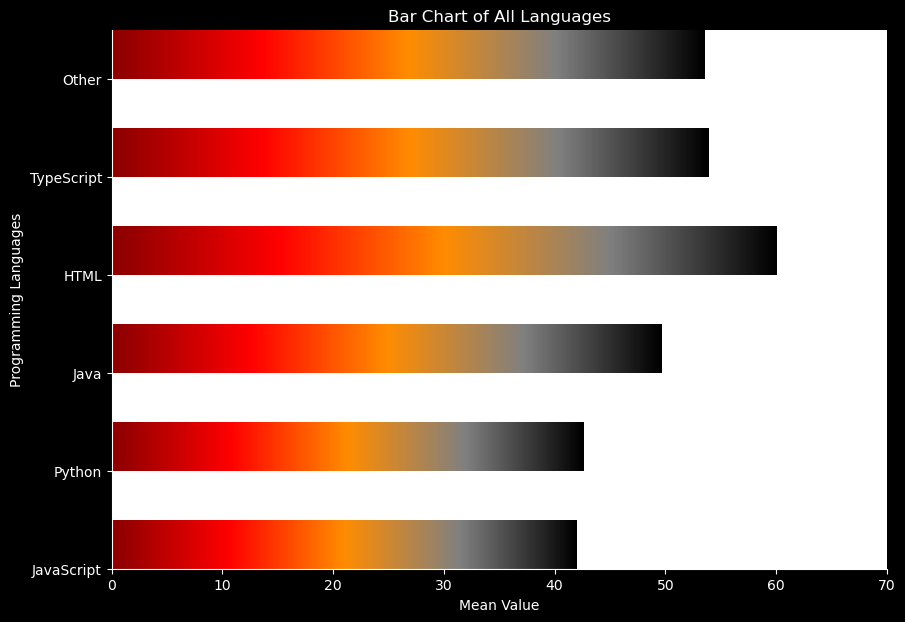

In [19]:
# Visual of dataset after cleaning and split 
columns = ['JavaScript', 'Python', 'Java', 'HTML', 'TypeScript', 'Other']

# For demonstration purposes, populating the DataFrame with random data:
data = w.np.random.randint(0, 100, size=(10, len(columns)))
train_df = w.pd.DataFrame(data, columns=columns)

w.plot_ombre_bars(train_df)

In [20]:
# Extract words from READMEs written in JavaScript language and clean them
javascript_words = w.clean(' '.join(train[train.language=='JavaScript']['extra_clean_contents']))

# Extract words from READMEs written in Python language and clean them
python_words = w.clean(' '.join(train[train.language=='Python']['extra_clean_contents']))

# Extract words from READMEs written in Java language and clean them
java_words =  w.clean(' '.join(train[train.language=='Java']['extra_clean_contents']))

# Extract words from READMEs written in HTML language and clean them
html_words =  w.clean(' '.join(train[train.language=='HTML']['extra_clean_contents']))

# Extract words from READMEs written in TypeScript language and clean them
type_words =  w.clean(' '.join(train[train.language=='TypeScript']['extra_clean_contents']))

# Extract words from READMEs not categorized into specific languages and clean them
other_words =  w.clean(' '.join(train[train.language=='Other']['extra_clean_contents']))

# Extract words from READMEs in the test set and clean them
all_words =  w.clean(' '.join(test['extra_clean_contents']))

# Call the function
w.clean_text = w.clean('JavaScript')
w.clean_text = w.clean('Python')
w.clean_text = w.clean('Java')
w.clean_text = w.clean('HTML')
w.clean_text = w.clean('TypeScript')
w.clean_text = w.clean('Other')
w.clean_text = w.clean('all')


                     
                     


In [21]:
# JavaScript and Other have the most words
len(javascript_words),len(python_words), len(java_words), len(html_words), len(type_words), len(other_words), len(all_words)


(1839, 983, 767, 404, 229, 2860, 1831)

In [22]:
set_python_words = set(python_words)
set_python_words

{'b',
 'bed',
 'bee',
 'begin',
 'beginning',
 'better',
 'bib',
 'big',
 'bigger',
 'bin',
 'binder',
 'bird',
 'blob',
 'block',
 'blue',
 'body',
 'book',
 'bord',
 'border',
 'bot',
 'bottom',
 'bug',
 'build',
 'building',
 'built',
 'bum',
 'business',
 'c',
 'ce',
 'cense',
 'cent',
 'center',
 'che',
 'check',
 'checker',
 'checkout',
 'chin',
 'choose',
 'choosing',
 'chosen',
 'circle',
 'cite',
 'clone',
 'cluster',
 'clustering',
 'cod',
 'code',
 'coffee',
 'cond',
 'condition',
 'conference',
 'configure',
 'connect',
 'connector',
 'consider',
 'considered',
 'content',
 'context',
 'continuous',
 'contribute',
 'contribution',
 'contributor',
 'convert',
 'cor',
 'core',
 'corke',
 'correct',
 'correctly',
 'cost',
 'course',
 'cover',
 'coy',
 'cross',
 'cud',
 'current',
 'currently',
 'curve',
 'custom',
 'cut',
 'cutting',
 'de',
 'decision',
 'dee',
 'defend',
 'deft',
 'derived',
 'desired',
 'desk',
 'detection',
 'determine',
 'dev',
 'device',
 'direct',
 'dire

In [23]:
len(set_python_words)


484

In [24]:
python_words

['b',
 'bed',
 'blob',
 'block',
 'blue',
 'body',
 'border',
 'bottom',
 'business',
 'c',
 'cense',
 'center',
 'check',
 'chin',
 'code',
 'coffee',
 'configure',
 'connect',
 'content',
 'contributor',
 'cor',
 'cost',
 'cover',
 'decision',
 'defend',
 'desk',
 'device',
 'directory',
 'discord',
 'discussion',
 'dismiss',
 'doc',
 'docker',
 'driven',
 'due',
 'e',
 'en',
 'ensure',
 'entry',
 'er',
 'f',
 'fee',
 'file',
 'first',
 'fit',
 'flow',
 'flowing',
 'fly',
 'free',
 'fruition',
 'fund',
 'future',
 'g',
 'get',
 'gree',
 'h',
 'height',
 'highly',
 'history',
 'hook',
 'icon',
 'id',
 'ide',
 'indoor',
 'interesting',
 'io',
 'issue',
 'join',
 'key',
 'l',
 'let',
 'level',
 'lo',
 'login',
 'long',
 'look',
 'loss',
 'lug',
 'ly',
 'medium',
 'metis',
 'min',
 'mo',
 'mode',
 'monitor',
 'must',
 'n',
 'ne',
 'network',
 'new',
 'news',
 'nexus',
 'note',
 'notice',
 'nucleus',
 'occur',
 'often',
 'one',
 'ose',
 'ref',
 'reference',
 'refinery',
 'rel',
 'reset',


In [26]:
# Calculate the word frequency for JavaScript language
javascript_freq = pd.Series(javascript_words).value_counts()

# Calculate the word frequency for Python language
python_freq = pd.Series(python_words).value_counts()

# Calculate the word frequency for Java language
java_freq = pd.Series(java_words).value_counts()

# Calculate the word frequency for HTML language
html_freq = pd.Series(html_words).value_counts()

# Calculate the word frequency for TypeScript language
type_freq = pd.Series(type_words).value_counts()

# Calculate the word frequency for all languages combined
all_freq = pd.Series(all_words).value_counts()

# Calculate the word frequency for words not categorized in specific languages
other_freq = pd.Series(other_words).value_counts()


In [27]:
word_counts = pd.concat([python_freq, java_freq, javascript_freq, html_freq, type_freq, other_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['Python', 'Java', 'JavaScript', 'HTML', 'TypeScript', 'Other', 'All']

word_counts.head()


,Python,Java,JavaScript,HTML,TypeScript,Other,All
u,9,8,18,5,2,31,21
security,7,6,16,4,1,25,16
n,7,7,16,4,1,25,16
directory,7,7,15,4,1,22,16
discussion,7,6,16,4,1,25,16


### ALL LANGUAGES OBSERVED

In [28]:
# Display the top 10 most common words on ALL programming languages
word_counts['All'].sort_values(ascending=False).head(10)



u            21
e            20
height       19
must         18
reference    18
new          18
title        17
id           17
version      17
v            17
Name: All, dtype: int64

#### Top 3 words: height, must, reference, Words that seem to be common among coding languages: title, desk, height, blob.Words that seem to be common among coding languages: title, desk, height, blob

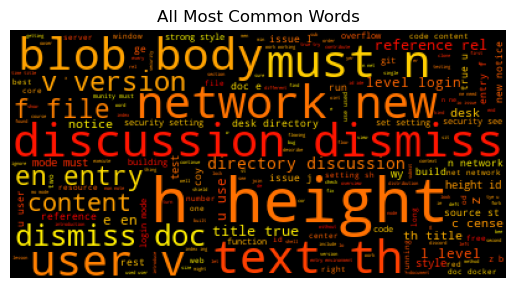

In [29]:
# Generate a word cloud image using the 'All' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(all_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('All Most Common Words', color='black')

# Display the plot
plt.show()


**JAVASCRIPT**          

In [30]:
# Calculate the word frequency for JavaScript language
javascript_freq = pd.Series(javascript_words).value_counts()

# Calculate the word frequency for Python language
python_freq = pd.Series(python_words).value_counts()

# Calculate the word frequency for Java language
java_freq = pd.Series(java_words).value_counts()

# Calculate the word frequency for HTML language
html_freq = pd.Series(html_words).value_counts()

# Calculate the word frequency for TypeScript language
type_freq = pd.Series(type_words).value_counts()

# Calculate the word frequency for all languages combined
all_freq = pd.Series(all_words).value_counts()

# Calculate the word frequency for words not categorized in specific languages
other_freq = pd.Series(other_words).value_counts()


In [31]:
# Display the top 10 most common words for the 'Javascript' category in descending order
word_counts.JavaScript.sort_values(ascending=False).head(10)
# Top 3 words: id, desk, rel

u          18
l          16
id         16
desk       16
rel        16
title      16
blob       16
z          16
version    16
body       16
Name: JavaScript, dtype: int64

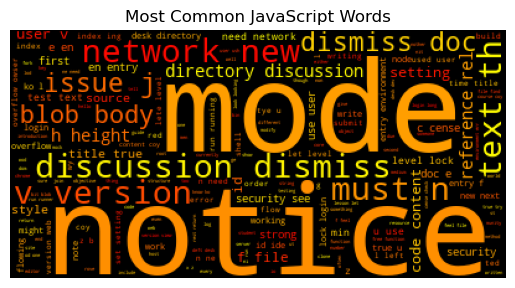

In [32]:
# Generate a word cloud image using the 'javascript_words' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(javascript_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common JavaScript Words', color='black')

# Display the plot
plt.show()

**PYTHON**            

In [33]:
# Retrieve the top 10 most frequent words in the 'python' category
word_counts.Python.sort_values(ascending=False).head(10)

# Top 3 words: user, desk, rel 

u          9
user       7
desk       7
rel        7
title      7
blob       7
z          7
version    7
body       7
v          7
Name: Python, dtype: int64

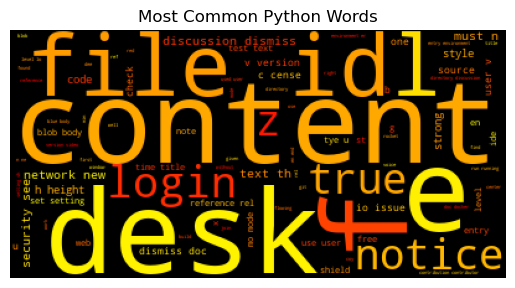

In [34]:
# Generate a word cloud visualization for the most common Python words
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(python_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common Python Words', color='black')

# Display the plot
plt.show()

**JAVA**                

In [35]:
# Display the top 10 most common words in the Java programming language
word_counts.Java.sort_values(ascending=False).head(10)

#Top 3 words: setting, id, version


u            8
e            7
setting      7
th           7
version      7
id           7
issue        7
text         7
directory    7
doc          7
Name: Java, dtype: int64

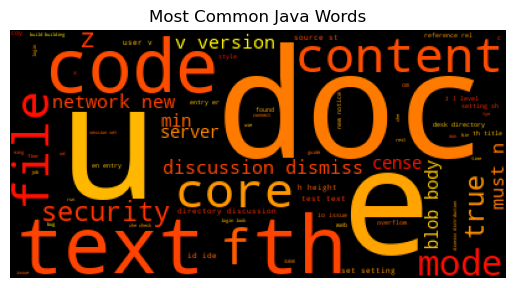

In [36]:
# Generate and display a word cloud visualization for the most common Java words
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(java_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common Java Words', color='black')

# Display the plot
plt.show()


**HTML**                                 

In [37]:
# Display the top 10 most common words in the HTML programming language
word_counts.HTML.sort_values(ascending=False).head(10)

# Top 3 words: body, id, reference


u            5
body         4
id           4
reference    4
desk         4
title        4
blob         4
z            4
version      4
v            4
Name: HTML, dtype: int64

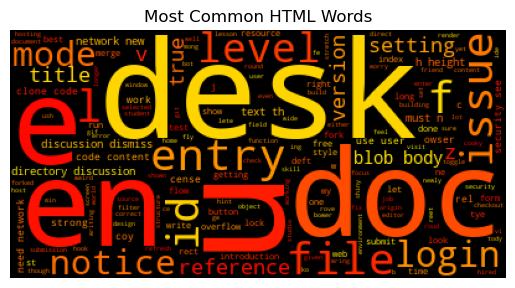

In [38]:
# Generate a word cloud image using the 'HTML' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(html_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common HTML Words', color='black')

# Display the plot
plt.show()


**TYPESCRIPT**           

In [39]:
# Display the top 10 most common words in the TypeScript programming language
word_counts.TypeScript.sort_values(ascending=False).head(10)

# Top 3 words: mount, round, overview.However, there is a small sample size here, so this is likely not representative.

u           2
mount       1
round       1
overview    1
think       1
yes         1
cent        1
ignore      1
ted         1
longer      1
Name: TypeScript, dtype: int64

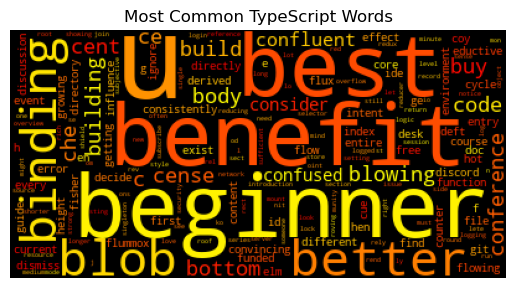

In [40]:
# Generate a word cloud image using the 'TypeScript' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(type_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common TypeScript Words', color='black')

# Display the plot
plt.show()

**OTHER**       

In [41]:
word_counts.Other.sort_values(ascending=False).head(10)

# Top 3 words: height, setting, reference

u            31
e            27
height       25
setting      25
reference    25
desk         25
title        25
blob         25
z            25
version      25
Name: Other, dtype: int64

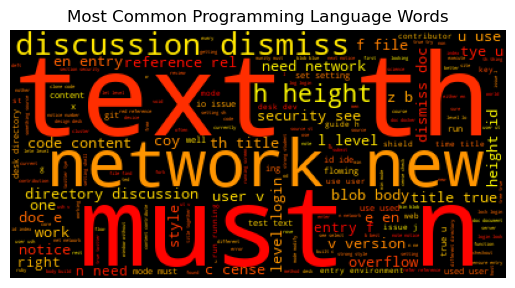

In [42]:
# Generate a word cloud image using the 'other' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(other_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('Most Common Programming Language Words', color='black')

# Display the plot
plt.show()


### Question 1: Are there any notable variations in the frequency of words between README files written in different programming languages?

In [43]:
# Sort the DataFrame 'word_counts' in descending order based on the 'all' column. This will arrange the words in the DataFrame by their frequency in descending order
word_counts.sort_values('All', ascending=False)

,Python,Java,JavaScript,HTML,TypeScript,Other,All
u,9,8,18,5,2,31,21
e,7,7,16,4,1,27,20
height,7,6,16,4,1,25,19
must,7,6,16,4,1,25,18
reference,7,6,16,4,1,25,18
...,...,...,...,...,...,...,...
suggestion,0,0,1,0,1,3,0
urge,0,0,1,0,0,0,0
ber,0,0,1,0,0,0,0
bound,0,0,1,0,0,0,0


In [44]:
# Set the default figure size for matplotlib plots to (13, 7)
plt.rc('figure', figsize=(13, 7))

# Apply the 'seaborn-darkgrid' style to matplotlib plots.This style provides a dark background with gridlines, enhancing visualization
plt.style.use('seaborn-darkgrid')


<Axes: >

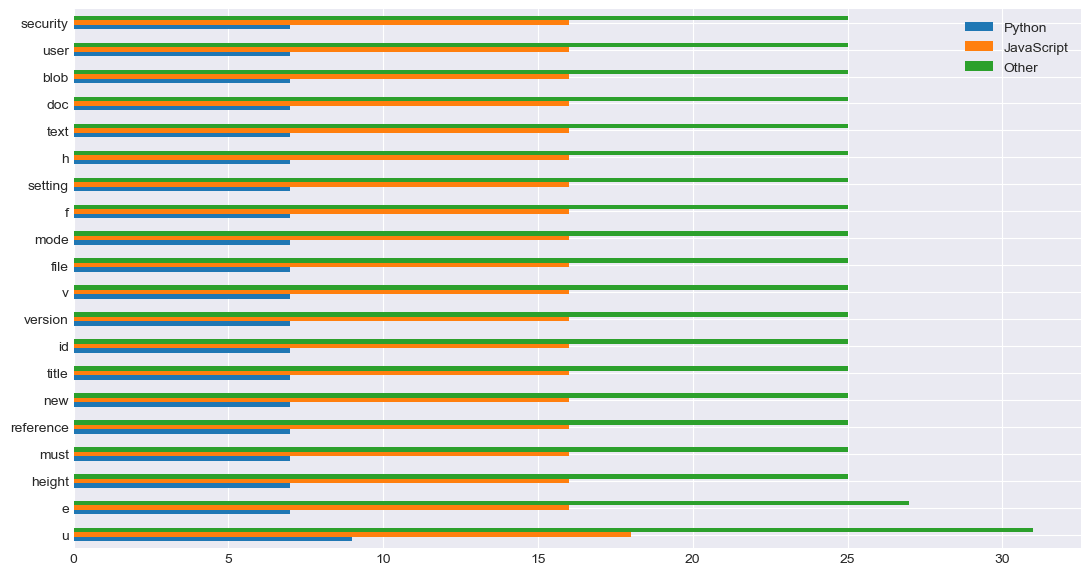

In [45]:
# Sort the 'word_counts' DataFrame based on the 'all' column in descending order,then select the top 20 rows and columns 'python', 'script', and 'other'.Finally, create a horizontal bar plot to visualize the top 20 words for each language
word_counts.sort_values('All', ascending=False)[['Python', 'JavaScript', 'Other']].head(20).plot.barh()


### QUESTION 1 Findings

#### **Methodology and Insights:**
Outliers were removed to prevent data skewness and ensure more accurate insights.Data Grouping Grouped by program, lesson, and cohort to gauge lesson popularity within cohorts.Data Sorting Lessons were sorted based on student access frequency.Program Filtering focus was narrowed down to specific program-related lessons.Irrelevant Lesson Removal lessons not pertinent to the program or not favored by students were excluded.

#### **Findings: ** The words in each language seem to vary in the same way. This may be an artifact of cleaning the words by only accepting dictionary words.**


####  **Takeaways:**

#### **Recommendation:**
 

### Question 2: What are the Top python Libraries used?

### QUESTION 2 Findings

#### **Methodology and Insights:**

#### **Findings: **


####  **Takeaways:**

#### **Recommendation:**
 

### Question 3: What are the most frequently used words throughout the dataset and for each language?

In [4]:
# Access the 'all' column from the 'word_counts' DataFrameThen, sort the values in descending order to get the most frequent words first

# Use .head(10) to extract the top 10 most frequent words
word_counts['all'].sort_values(ascending=False).head(10)


NameError: name 'word_counts' is not defined

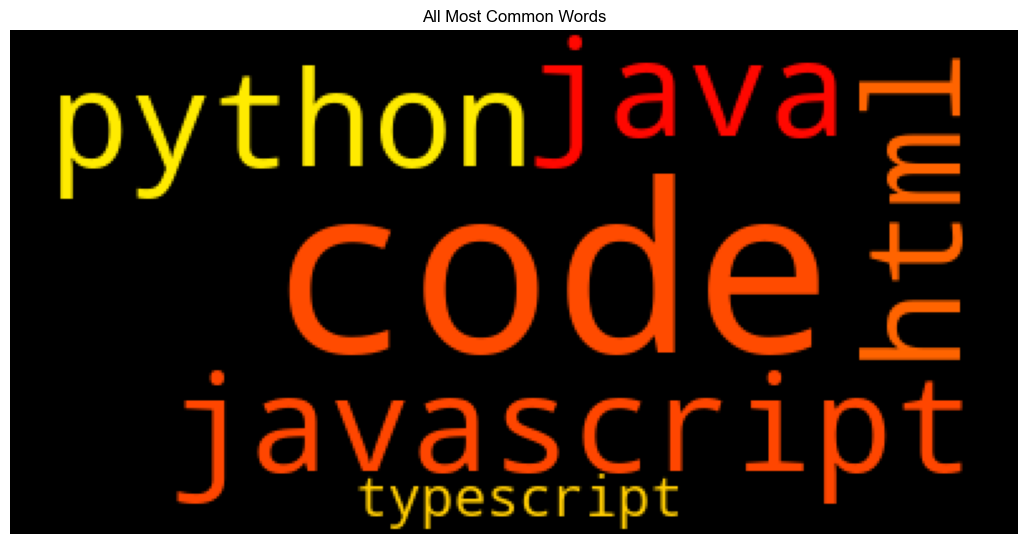

In [80]:
# Generate a word cloud image using the 'All' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(all_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('All Most Common Words', color='black')

# Display the plot
plt.show()


### QUESTION 3 Findings

#### **Methodology and Insights:**

#### **Findings: ** Top 3 words: height, must, reference
Words that seem to be common among coding languages: title, desk, height, blob# Concatenate frequency DataFrames for each language and the overall frequency axis=1 concatenates the DataFrames horizontally (side by side)


####  **Takeaways:**

#### **Recommendation:**
 

### Question 4: What are the least frequently used words throughout the dataset and for each language?

In [81]:
# Sample data (replace this with your actual data)
data = {
    'Language': ['JavaScript', 'Python', 'Java', 'HTML', 'TypeScript', 'Other', 'All'],
    'Word': ['neynf', 'neynf', 'mexico', 'neynf', 'neynf', 'neynf', 'sn']
}

df = pd.DataFrame(data)

# Create an interactive bar chart with custom styling
fig = px.bar(df, x='Word', y='Language', text='Word', orientation='h',
             title='Least Used Words Per Language',
             labels={'Word': 'Least Used Word', 'Language': 'Programming Language'},
             width=800, height=500)

# Customize the appearance of the chart
fig.update_traces(texttemplate='%{text}', textposition='outside', marker_color='red')
fig.update_layout(
    xaxis_title='Least Used Word',
    yaxis_title='',
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickfont_color='white'),  # Set x-axis tick text color to white
    yaxis=dict(tickfont_color='white'),  # Set y-axis tick text color to white
    legend=dict(x=0.8, y=1.02),  # Adjust legend position
    font=dict(color='white')  # Set all text color to white

SyntaxError: incomplete input (1669199296.py, line 25)

### QUESTION 4 Findings

#### **Methodology and Insights:**

#### **Findings: ** 

####  **Takeaways:**

#### **Recommendation:**
 

In [82]:
# Least_used_words_per_language


result_least_used_words = w.least_used_words_per_language(train)
result_least_used_words

JavaScript     neynf
Python         neynf
Java          mexico
HTML           neynf
TypeScript     neynf
Other          neynf
All               sn
Total          neynf
dtype: object

### Feature will be tested and modeled 

# STATISTICAL TESTING

README Word Frequency Hypothesis:
 
- alpha = .05
- **$H_{0}$** There is no significant variation in the frequency of words between README files written in different programming languages.
- **$H_{a}$** There are significant variations in the frequency of words between README files written in different programming languages.

Python Library Hypothesis:

- alpha = .05
- **$H_{0}$** The presence of Python libraries in the README file does not correspond with the programming language used.
- **$H_{a}$** The presence of Python libraries in the README file corresponds with the programming language used.

Most Frequently Used Words Hypothesis:

- alpha = .05
- **$H_{0}$** The frequency distribution of words is similar throughout the dataset and across different programming languages.
- **$H_{a}$** The frequency distribution of words is significantly different throughout the dataset and across different programming languages.

Least Frequently Used Words Hypothesis:

- alpha = .05
- **$H_{0}$** The least frequent words have consistent usage patterns throughout the dataset and across different programming languages.
- **$H_{a}$** The least frequent words have varying usage patterns throughout the dataset and across different programming languages.

# STATISTICAL FINDINGS
- ge Hypothesis - We reject the Null Hypothesis, Age is dependent on employee Attrition.
- Education Hypothesis We reject the Null Hypothesis, education is dependent on on employee Attrition.
- Tenure Hypothesis - We fail to reject the Null Hypothesis, Tenure is independent of employee Attrition.
- 

# SPLITTING DATA

In [ ]:
train, validate, test = m.split_data(words_df, 'language')


In [ ]:
train


In [ ]:
#Split the data in to X and Y for all datasets with Yes_Attrition and those without 

X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test, feature_names = prepare_for_modeling(train, validate, test)

In [ ]:
scores_df = decision_tree(X_bow, X_validate_bow, y_train, y_validate)
scores_df

In [ ]:
selected_y_train.head()
selected_y_train.shape

### EVALUATE BASELINE

In [ ]:
# baseline =(selected_y_train==0).mean()
# print(f'The baseline accuracy is: {baseline:.2%}')

# MODELING

### DECISION TREE

### RANDOM FOREST

### KNN